In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!nvidia-smi

Sun Mar 28 11:20:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(25000,) (25000,)
(25000,) (25000,)


In [40]:
train_data[:3]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
for w in train_data:
  print(max(w), len(w),w)
print(max(max(w)))

In [ ]:
max(max(w) for w in train_data) # 가장 큰 (단어의 인덱스)/ 즉 가장 끝단어의 인덱스(번호)

88586

In [ ]:
max(map(max, train_data))

88586

리뷰 최대 길이 : 2494
리뷰 평균 길이 : 238.71364


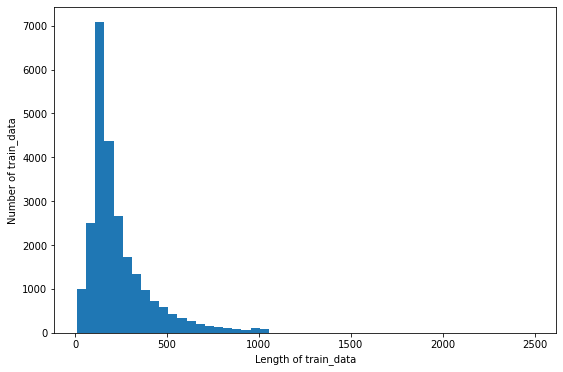

In [ ]:
import matplotlib.pyplot as plt

print('리뷰 최대 길이 :', max(len(l) for l in train_data))
print('리뷰 평균 길이 :', sum(map(len, train_data))/len(train_data))

plt.figure(figsize=(9,6))
plt.hist([len(l) for l in train_data], bins=50)
plt.xlabel('Length of train_data')
plt.ylabel('Number of train_data')
plt.show()


In [ ]:
import numpy as np

unique_elements, counts_elements = np.unique(train_labels, return_counts=True)

print('Label 빈도수 :')
print(np.asarray((unique_elements, counts_elements)))

Label 빈도수 :
[[    0     1]
 [12500 12500]]


In [ ]:
print(len(train_data))

print(len(train_data[0]))
print(train_data[0][:10])
print(train_data[0].count(4))
print(train_labels[0])

25000
218
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
15
1


In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [41]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))  # train_data행, dimension열
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1.0
  return results
  

In [44]:
r = np.zeros((5,10))
v = [1,3,5,7,9]

for i, v in enumerate(v):
  r[i, v] = 1.0
  print(i,v)
print(r)

0 1
1 3
2 5
3 7
4 9
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [45]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

X_train.shape,  X_test.shape

((25000, 10000), (25000, 10000))

In [46]:
print(X_train[0][:21])
print(X_train[0][9979:])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [49]:
y_train = np.asarray(train_labels).astype(float)
y_test = np.asarray(test_labels).astype(float)

print(y_train[:21])
print(y_train.shape)
print(type(y_train))
print(train_labels[:21])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
(25000,)
<class 'numpy.ndarray'>
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0]


In [51]:
X_valid = X_train[:10000]
partial_X_train = X_train[10000:]

y_valid = y_train[:10000]
partial_y_train = y_train[10000:]

partial_X_train.shape, partial_y_train.shape, X_valid.shape, y_valid.shape

((15000, 10000), (15000,), (10000, 10000), (10000,))

In [56]:
from keras import models, layers

imdb = models.Sequential()
imdb.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
imdb.add(layers.Dense(18, activation='relu'))
imdb.add(layers.Dense(1, activation='sigmoid'))

imdb.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 18)                306       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 19        
Total params: 160,341
Trainable params: 160,341
Non-trainable params: 0
_________________________________________________________________


In [58]:
imdb.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
Hist = imdb.fit(partial_X_train, partial_y_train, epochs=50, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/50
30/30 [==============================] - 1s 28ms/step - loss: 2.4895e-04 - accuracy: 1.0000 - val_loss: 1.0891 - val_accuracy: 0.8640
Epoch 2/50
30/30 [==============================] - 1s 19ms/step - loss: 1.4624e-04 - accuracy: 1.0000 - val_loss: 1.1597 - val_accuracy: 0.8626
Epoch 3/50
30/30 [==============================] - 1s 19ms/step - loss: 8.9197e-05 - accuracy: 1.0000 - val_loss: 1.2150 - val_accuracy: 0.8634
Epoch 4/50
30/30 [==============================] - 1s 19ms/step - loss: 5.1921e-05 - accuracy: 1.0000 - val_loss: 1.2553 - val_accuracy: 0.8626
Epoch 5/50
30/30 [==============================] - 1s 18ms/step - loss: 3.6810e-05 - accuracy: 1.0000 - val_loss: 1.2876 - val_accuracy: 0.8623
Epoch 6/50
30/30 [==============================] - 1s 19ms/step - loss: 3.0530e-05 - accuracy: 1.0000 - val_loss: 1.3140 - val_accuracy: 0.8625
Epoch 7/50
30/30 [==============================] - 1s 18ms/step - loss: 2.5783e-05 - accuracy: 1.0000 - val_loss: 1.3385 - val_ac

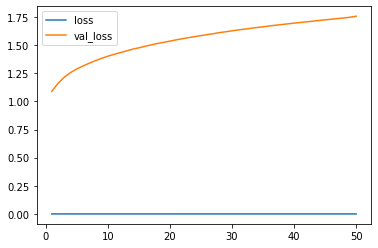

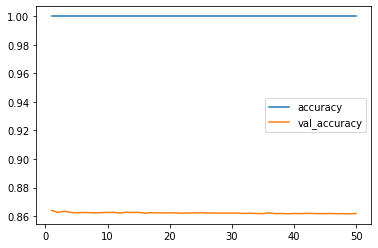

In [61]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()


In [62]:
loss, accuracy = imdb.evaluate(X_test, y_test)
loss, accuracy

782/782 [==============================] - 2s 2ms/step - loss: 1.8863 - accuracy: 0.8471


(1.8862661123275757, 0.8470799922943115)

In [63]:
imdb.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int32)